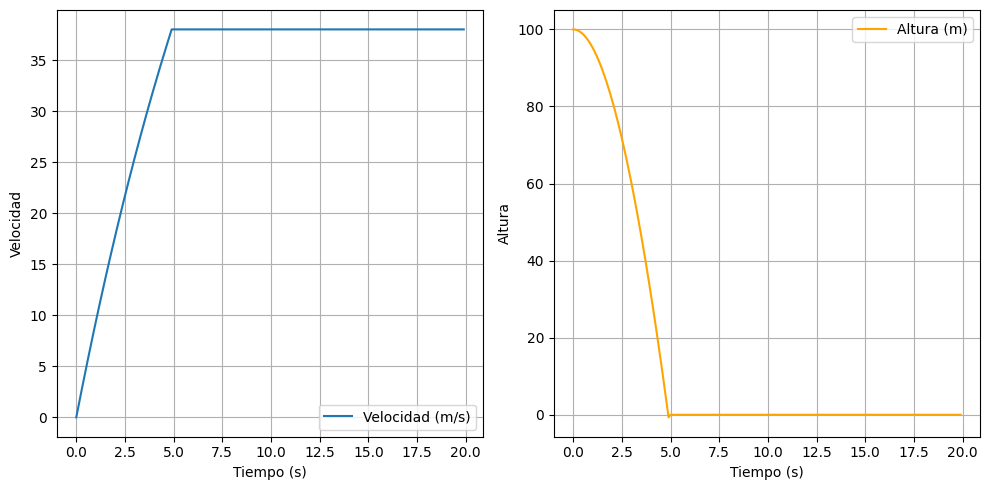

In [7]:
#Usa el método de Euler mejorado (RK2) para resolver esta ecuación
#calcula y grafica la velocidad y la posición del objeto en función del tiempo hasta que llegue al suelo.
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
g = 9.81      # gravedad (m/s^2)
k = 0.1       # coef. de resistencia (kg/s)
m = 1.0       # masa (kg)
h0 = 100.0    # altura inicial (m)
v0 = 0.0      # velocidad inicial (m/s)

# Tiempo
dt = 0.1
t_max = 20
t = np.arange(0, t_max, dt)

# Inicialización
v = np.zeros_like(t)
y = np.zeros_like(t)
v[0] = v0
y[0] = h0

# Función de aceleración
def a(v):
    return g - (k/m)*v

# Método de Euler mejorado (RK2)
for i in range(len(t)-1):
    if y[i] <= 0:
        y[i+1:] = 0
        v[i+1:] = v[i]
        break

    k1_v = dt * a(v[i])
    k2_v = dt * a(v[i] + k1_v)
    v[i+1] = v[i] + 0.5 * (k1_v + k2_v)

    y[i+1] = y[i] - dt * 0.5 * (v[i] + v[i+1])  # integración trapezoidal

# Gráfica
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(t, v, label="Velocidad (m/s)")
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(t, y, label="Altura (m)", color='orange')
plt.xlabel('Tiempo (s)')
plt.ylabel('Altura')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


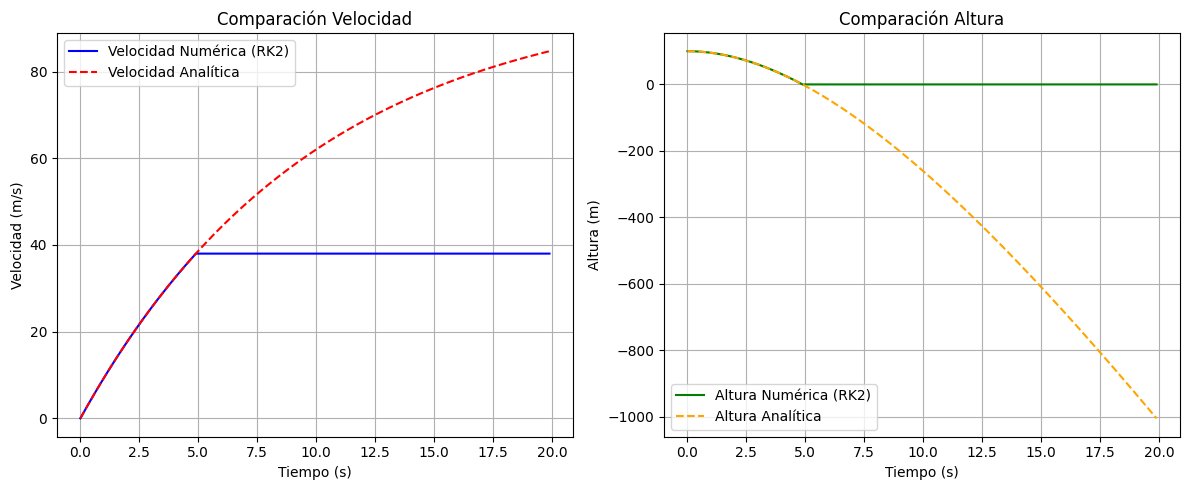

In [6]:
#Codigo para comparar graficamente los resultados entre el metodo numerico y el metodo analitico
#El codigo acontinuacion resuelve el problema desde ambos metodos y luego grafica los resultados
#las graficas mostrara los resultados de ambos metodos simultaneamente
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
g = 9.81      # gravedad (m/s^2)
k = 0.1       # coef. de resistencia (kg/s)
m = 1.0       # masa (kg)
h0 = 100.0    # altura inicial (m)
v0 = 0.0      # velocidad inicial (m/s)

# Tiempo
dt = 0.1
t_max = 20
t = np.arange(0, t_max, dt)

# Inicialización arrays numéricos
v_num = np.zeros_like(t)
y_num = np.zeros_like(t)
v_num[0] = v0
y_num[0] = h0

# Función de aceleración
def a(v):
    return g - (k/m)*v

# Solución numérica: Euler Mejorado (RK2)
for i in range(len(t)-1):
    if y_num[i] <= 0:
        y_num[i+1:] = 0
        v_num[i+1:] = v_num[i]
        break

    k1_v = dt * a(v_num[i])
    k2_v = dt * a(v_num[i] + k1_v)
    v_num[i+1] = v_num[i] + 0.5 * (k1_v + k2_v)

    y_num[i+1] = y_num[i] - dt * 0.5 * (v_num[i] + v_num[i+1])  # integración trapezoidal

# Solución analítica
v_analitica = (m*g/k) * (1 - np.exp(-(k/m)*t))
y_analitica = h0 - (m*g/k)*t + (m**2 * g / k**2)*(1 - np.exp(-(k/m)*t))

# Gráficas comparativas
plt.figure(figsize=(12,5))

# Velocidad
plt.subplot(1,2,1)
plt.plot(t, v_num, label="Velocidad Numérica (RK2)", color='blue')
plt.plot(t, v_analitica, '--', label="Velocidad Analítica", color='red')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Comparación Velocidad')
plt.grid(True)
plt.legend()

# Altura
plt.subplot(1,2,2)
plt.plot(t, y_num, label="Altura Numérica (RK2)", color='green')
plt.plot(t, y_analitica, '--', label="Altura Analítica", color='orange')
plt.xlabel('Tiempo (s)')
plt.ylabel('Altura (m)')
plt.title('Comparación Altura')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
